#                     Introduction to Keras and Tensorflow with Python

In [54]:
# Creating the work sapce and importing all neede libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [55]:
#Loading the Mnist Data
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Train data: {}, {}" .format(train_images.shape, train_labels.shape))
print( "Test data: {}, {}" .format(test_images.shape, test_labels.shape))

Train data: (60000, 28, 28), (60000,)
Test data: (10000, 28, 28), (10000,)


In [56]:
class_labels = np.unique(train_labels)
print( "There are {} classes in the dataset. They are: {}" .format(len(class_labels), class_labels))

There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


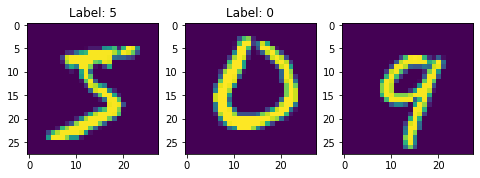

In [57]:
plt.figure(figsize=( 8 , 5 ))
plt.subplot( 1 , 3 , 1 )
plt.imshow(train_images[ 0 ])
plt.title( "Label: {}" .format(train_labels[ 0 ]))
plt.subplot( 1 , 3 , 2 )
plt.imshow(train_images[ 2500 ])
plt.title( "Label: {}" .format(train_labels[ 2500 ]))
plt.subplot( 1 , 3 , 3 )
plt.imshow(test_images[ 12 ])
plt.show()

In [58]:
# As usual, we scale our dataset to range between 0 and 1. In this dataset, the pixel valuesrange from 0 to 255.
# Dividing the data by 255 scales to the required range
train_images = train_images / 255.0
test_images = test_images / 255.0

In [59]:
# Split training data to training and validation sets.
x_train = train_images[ 0 : 50000 ]
x_val = train_images[ 50000 :]
y_train = train_labels[ 0 : 50000 ]
y_val = train_labels[ 50000 :]
print( "x_train: {}" .format(x_train.shape)) # prints x_train: (50000, 28, 28)
print( "x_val: {}" .format(x_val.shape)) # prints x_val: (10000, 28, 28)
print( "y_train: {}" .format(y_train.shape)) #prints y_train: (50000,)
print( "y_val: {}" .format(y_val.shape)) #prints y_val: (10000,)

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [60]:
# Reshape data from 28 * 28 array to a single array
new_dimension = np.prod(train_images.shape[ 1 :])
x_train = x_train.reshape(x_train.shape[ 0 ], new_dimension)
x_val = x_val.reshape(x_val.shape[ 0 ], new_dimension)
test_images = test_images.reshape(test_images.shape[ 0 ], new_dimension)
print( "x_train: {}" .format(x_train.shape)) #prints x_train: (50000, 784)
print( "x_val: {}" .format(x_val.shape)) #prints x_val: (10000, 784)
print( "test_images: {}" .format(test_images.shape)) #prints test_images: (10000, 784)

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [61]:
#Encode labels to categorical variables
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

In [62]:
#Activation functions and Neural Networks Hyperparameters
# inputs
#placeholders are not enabled in tf 2
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.test.gpu_device_name()
new_dimension = np.prod(train_images.shape[ 1 :])
X = tf.placeholder(tf.float32, [ None , new_dimension])
Y = tf.placeholder(tf.float32, [ None , no_labels])
# create model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons= 256 , second_layer_neurons= 128 ) :
    # first layer
    first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
    first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
    first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))
    # second layer
    second_weight = tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
    second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
    second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight),second_bias))
    # output layer
    final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
    final_bias = tf.Variable(tf.zeros([no_classes]))
    logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)
    return logits
logits = multilayer_perceptron(X, no_labels)
learning_rate = 0.01
#we define the loss and

In [63]:
#we define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)
#initialise the variables
    
        
init = tf.global_variables_initializer()

epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size
#train model
with tf.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size
    for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_train[start: end]
      _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
      start += batch_size
      end += batch_size 
      #average loss
      average_cost += loss/iteration
    print("Epoch========{}".format(epoch))
    #evaluate model
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
  print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))

Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy: 0.9003000259399414


In [64]:
#LESSON 2: Regularization and Optimization
#Building a Sequential Feed Forward Network in Keras
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Dense( 256 , activation= 'relu' , input_shape=(new_dimension,)))
model.add(Dense( 128 , activation= 'relu' ))
model.add(Dense(no_labels, activation= 'softmax' ))

In [65]:
model.compile(optimizer= 'adam' , loss=tf.keras.losses.categorical_crossentropy, metrics=[ 'accuracy' ])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs= 20 ,batch_size= 1000 )
test_loss, test_accuracy = model.evaluate(test_images, y_test)
print( 'Test loss: {}' .format(test_loss))
print( 'Test accuracy: {}' .format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 174us/sample - loss: 0.7051 - acc: 0.8093 - val_loss: 0.2577 - val_acc: 0.9297
Epoch 2/20
50000/50000 [==============================] - 8s 162us/sample - loss: 0.2364 - acc: 0.9322 - val_loss: 0.1857 - val_acc: 0.9511
Epoch 3/20
50000/50000 [==============================] - 10s 191us/sample - loss: 0.1714 - acc: 0.9510 - val_loss: 0.1471 - val_acc: 0.9578
Epoch 4/20
50000/50000 [==============================] - 9s 178us/sample - loss: 0.1347 - acc: 0.9623 - val_loss: 0.1266 - val_acc: 0.9635
Epoch 5/20
50000/50000 [==============================] - 10s 206us/sample - loss: 0.1095 - acc: 0.9688 - val_loss: 0.1136 - val_acc: 0.9677
Epoch 6/20
50000/50000 [==============================] - 10s 192us/sample - loss: 0.0916 - acc: 0.9743 - val_loss: 0.1031 - val_acc: 0.9709
Epoch 7/20
50000/50000 [==============================] - 10s 203us/sample - loss: 0.0765 - acc: 0.9778 - v

Text(0.5, 1.0, 'Loss Curves - before regularisation')

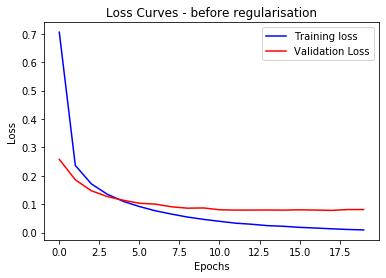

In [66]:
#Check for Overfitting
plt.figure()
plt.plot(history.history[ 'loss' ], 'blue' )
plt.plot(history.history[ 'val_loss' ], 'red' )
plt.legend([ 'Training loss' , 'Validation Loss' ])
plt.xlabel( 'Epochs' )
plt.ylabel( 'Loss' )
plt.title( 'Loss Curves - before regularisation' )

In [67]:
#Although the validation and training loss seem great, we can see that the validation #loss
#increases. This identifies overfitting in our network. How do we proceed? #Introduce
#regularisation to the model.
from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense( 256 , activation= 'relu' , input_shape=(new_dimension,)))
reg_model.add(Dropout( 0.4 ))
reg_model.add(Dense( 128 , activation= 'relu' ))
reg_model.add(Dropout( 0.4 ))
reg_model.add(Dense(no_labels, activation= 'softmax' ))

In [68]:
reg_model.compile(optimizer= 'adam' , loss=tf.keras.losses.categorical_crossentropy, metrics=[ 'accuracy' ])
reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs= 20 , batch_size= 1000 )
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print( 'Test loss: {}' .format(test_loss))
print( 'Test accuracy: {}' .format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 11s 226us/sample - loss: 0.9813 - acc: 0.6930 - val_loss: 0.2996 - val_acc: 0.9157
Epoch 2/20
50000/50000 [==============================] - 10s 209us/sample - loss: 0.3794 - acc: 0.8893 - val_loss: 0.2025 - val_acc: 0.9408
Epoch 3/20
50000/50000 [==============================] - 10s 196us/sample - loss: 0.2843 - acc: 0.9169 - val_loss: 0.1661 - val_acc: 0.9516
Epoch 4/20
50000/50000 [==============================] - 9s 185us/sample - loss: 0.2337 - acc: 0.9313 - val_loss: 0.1402 - val_acc: 0.9589
Epoch 5/20
50000/50000 [==============================] - 9s 189us/sample - loss: 0.2019 - acc: 0.9418 - val_loss: 0.1240 - val_acc: 0.9637
Epoch 6/20
50000/50000 [==============================] - 11s 210us/sample - loss: 0.1806 - acc: 0.9472 - val_loss: 0.1130 - val_acc: 0.9671
Epoch 7/20
50000/50000 [==============================] - 11s 216us/sample - loss: 0.1618 - acc: 0.9525 - 

In [69]:
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print( 'Test loss: {}' .format(test_loss))
print( 'Test accuracy: {}' .format(test_accuracy))

Test loss: 0.06539995702326996
Test accuracy: 0.9800999760627747


Text(0.5, 1.0, 'Loss Curves - after regularisation')

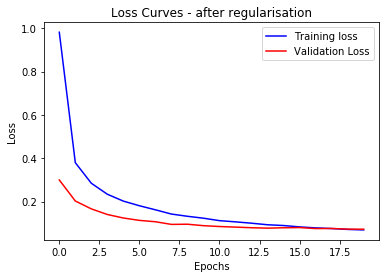

In [70]:
plt.figure()
plt.plot(reg_history.history[ 'loss' ], 'blue' )
plt.plot(reg_history.history[ 'val_loss' ], 'red' )
plt.legend([ 'Training loss' , 'Validation Loss' ])
plt.xlabel( 'Epochs' )
plt.ylabel( 'Loss' )
plt.title( 'Loss Curves - after regularisation' )